In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adult-census-income/adult.csv


In [3]:
df = pd.read_csv("/kaggle/input/adult-census-income/adult.csv")

In [4]:
print(df.head(3))
print(df.shape)
print(df.describe())
print(df.info())

   age workclass  fnlwgt     education  education.num marital.status  \
0   90         ?   77053       HS-grad              9        Widowed   
1   82   Private  132870       HS-grad              9        Widowed   
2   66         ?  186061  Some-college             10        Widowed   

        occupation   relationship   race     sex  capital.gain  capital.loss  \
0                ?  Not-in-family  White  Female             0          4356   
1  Exec-managerial  Not-in-family  White  Female             0          4356   
2                ?      Unmarried  Black  Female             0          4356   

   hours.per.week native.country income  
0              40  United-States  <=50K  
1              18  United-States  <=50K  
2              40  United-States  <=50K  
(32561, 15)
                age        fnlwgt  education.num  capital.gain  capital.loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679  

In [5]:
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64


In [6]:
print("Missing values:")
print((df == '?').sum())

Missing values:
age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


In [7]:
df.replace('?', np.nan, inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,30162.0,38.437902,13.134665,17.0,28.00,37.0,47.0,90.0
fnlwgt,30162.0,189793.833930,105652.971529,13769.0,117627.25,178425.0,237628.5,1484705.0
education.num,30162.0,10.121312,2.549995,1.0,9.00,10.0,13.0,16.0
capital.gain,30162.0,1092.007858,7406.346497,0.0,0.00,0.0,0.0,99999.0
capital.loss,30162.0,88.372489,404.298370,0.0,0.00,0.0,0.0,4356.0
hours.per.week,30162.0,40.931238,11.979984,1.0,40.00,40.0,45.0,99.0


In [9]:
df.shape

(30162, 15)

In [10]:
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# PyTorch
import torch
from torch.utils.data import DataLoader, TensorDataset

In [11]:
df["education"].value_counts()

education
HS-grad         9840
Some-college    6678
Bachelors       5044
Masters         1627
Assoc-voc       1307
11th            1048
Assoc-acdm      1008
10th             820
7th-8th          557
Prof-school      542
9th              455
12th             377
Doctorate        375
5th-6th          288
1st-4th          151
Preschool         45
Name: count, dtype: int64

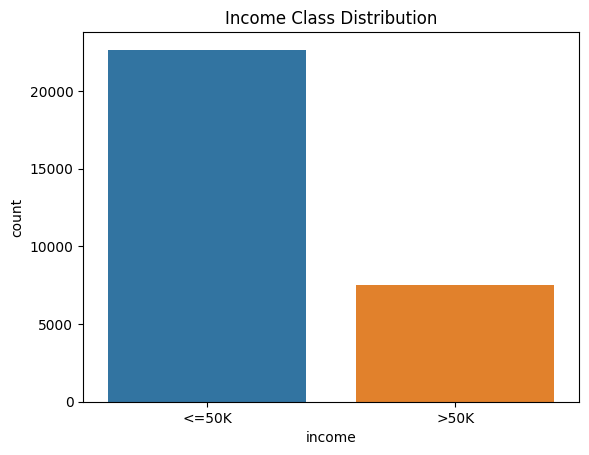

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

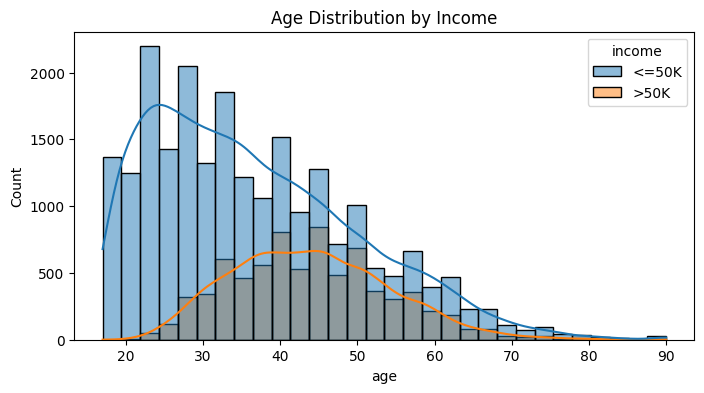

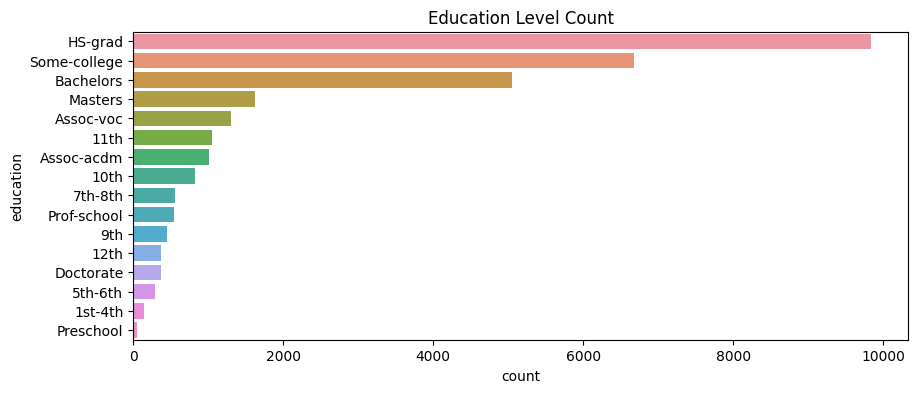

In [12]:
# Class balance
sns.countplot(data=df, x='income')
plt.title("Income Class Distribution")
plt.show()

# Example: Age vs Income
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True)
plt.title("Age Distribution by Income")
plt.show()

# Example: Education level count
plt.figure(figsize=(10, 4))
sns.countplot(data=df, y='education', order=df['education'].value_counts().index)
plt.title("Education Level Count")
plt.show()


In [13]:
categorical_cols = df.select_dtypes(include="object").columns

In [14]:
print(categorical_cols)

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')


In [15]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [16]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,2,132870,11,9,6,3,1,4,0,0,4356,18,38,0
3,54,2,140359,5,4,0,6,4,4,0,0,3900,40,38,0
4,41,2,264663,15,10,5,9,3,4,0,0,3900,40,38,0
5,34,2,216864,11,9,0,7,4,4,0,0,3770,45,38,0
6,38,2,150601,0,6,5,0,4,4,1,0,3770,40,38,0


In [17]:
df.dtypes

age               int64
workclass         int64
fnlwgt            int64
education         int64
education.num     int64
marital.status    int64
occupation        int64
relationship      int64
race              int64
sex               int64
capital.gain      int64
capital.loss      int64
hours.per.week    int64
native.country    int64
income            int64
dtype: object

In [11]:
for col, le in label_encoders.items():
    print("col name: ", col)
    print(le.classes_, "\n")
    

col name:  workclass
['Federal-gov' 'Local-gov' 'Private' 'Self-emp-inc' 'Self-emp-not-inc'
 'State-gov' 'Without-pay'] 

col name:  education
['10th' '11th' '12th' '1st-4th' '5th-6th' '7th-8th' '9th' 'Assoc-acdm'
 'Assoc-voc' 'Bachelors' 'Doctorate' 'HS-grad' 'Masters' 'Preschool'
 'Prof-school' 'Some-college'] 

col name:  marital.status
['Divorced' 'Married-AF-spouse' 'Married-civ-spouse'
 'Married-spouse-absent' 'Never-married' 'Separated' 'Widowed'] 

col name:  occupation
['Adm-clerical' 'Armed-Forces' 'Craft-repair' 'Exec-managerial'
 'Farming-fishing' 'Handlers-cleaners' 'Machine-op-inspct' 'Other-service'
 'Priv-house-serv' 'Prof-specialty' 'Protective-serv' 'Sales'
 'Tech-support' 'Transport-moving'] 

col name:  relationship
['Husband' 'Not-in-family' 'Other-relative' 'Own-child' 'Unmarried' 'Wife'] 

col name:  race
['Amer-Indian-Eskimo' 'Asian-Pac-Islander' 'Black' 'Other' 'White'] 

col name:  sex
['Female' 'Male'] 

col name:  native.country
['Cambodia' 'Canada' 'China' 

In [12]:
for col in categorical_cols:
    if df[col].dtype == 'int64' and col != 'income':
        print(f"\n{col}:\n", df[col].value_counts())



workclass:
 workclass
2    22286
4     2499
1     2067
5     1279
3     1074
0      943
6       14
Name: count, dtype: int64

education:
 education
11    9840
15    6678
9     5044
12    1627
8     1307
1     1048
7     1008
0      820
5      557
14     542
6      455
2      377
10     375
4      288
3      151
13      45
Name: count, dtype: int64

marital.status:
 marital.status
2    14065
4     9726
0     4214
5      939
6      827
3      370
1       21
Name: count, dtype: int64

occupation:
 occupation
9     4038
2     4030
3     3992
0     3721
11    3584
7     3212
6     1966
13    1572
5     1350
4      989
12     912
10     644
8      143
1        9
Name: count, dtype: int64

relationship:
 relationship
0    12463
1     7726
3     4466
4     3212
5     1406
2      889
Name: count, dtype: int64

race:
 race
4    25933
2     2817
1      895
0      286
3      231
Name: count, dtype: int64

sex:
 sex
1    20380
0     9782
Name: count, dtype: int64

native.country:
 native.country
3

In [13]:
df['income'].value_counts(normalize=True)
 # 0 is less than 50k

income
0    0.751078
1    0.248922
Name: proportion, dtype: float64

In [14]:
df.corr()["income"].sort_values(ascending = False) # only captures linear relationships

income            1.000000
education.num     0.335286
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
sex               0.216699
capital.loss      0.150053
education         0.078987
race              0.071658
occupation        0.051577
native.country    0.023268
workclass         0.018044
fnlwgt           -0.008957
marital.status   -0.193518
relationship     -0.251003
Name: income, dtype: float64

In [15]:
X = df.drop("income", axis=1)
y = df["income"]

In [16]:
from scipy.stats import ttest_ind

for col in ['age', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']:
    group0 = df[df['income'] == 0][col]
    group1 = df[df['income'] == 1][col]
    t_stat, p_val = ttest_ind(group0, group1, equal_var=False)
    print(f"{col}: t = {t_stat:.2f}, p = {p_val:.4f}")


age: t = -49.50, p = 0.0000
education.num: t = -62.39, p = 0.0000
capital.gain: t = -22.80, p = 0.0000
capital.loss: t = -19.64, p = 0.0000
hours.per.week: t = -43.20, p = 0.0000


In [17]:
drop_cols = []

In [18]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler

X_scaled = MinMaxScaler().fit_transform(X)  # chi2 requires non-negative features
chi2_scores, chi2_pvals = chi2(X_scaled, y)

print("\n=== Chi-Squared p-values ===")
for col, p in zip(X.columns, chi2_pvals):
    print(f"{col}: p-value = {p:.4e}")


=== Chi-Squared p-values ===
age: p-value = 2.9710e-44
workclass: p-value = 4.1056e-01
fnlwgt: p-value = 7.4669e-01
education: p-value = 2.6643e-05
education.num: p-value = 6.3719e-37
marital.status: p-value = 1.7324e-37
occupation: p-value = 4.1209e-05
relationship: p-value = 1.9118e-151
race: p-value = 6.7690e-03
sex: p-value = 6.6704e-102
capital.gain: p-value = 3.1436e-163
capital.loss: p-value = 1.1318e-64
hours.per.week: p-value = 2.3062e-14
native.country: p-value = 5.1781e-01


In [19]:
drop_cols.extend(["fnlwgt","workclass","native.country"])


=== Feature-to-feature correlation matrix ===
                     age  workclass    fnlwgt  education  education.num  \
age             1.000000   0.080540 -0.076511  -0.001111       0.043526   
workclass       0.080540   1.000000 -0.032493   0.017855       0.037833   
fnlwgt         -0.076511  -0.032493  1.000000  -0.027102      -0.044992   
education      -0.001111   0.017855 -0.027102   1.000000       0.345410   
education.num   0.043526   0.037833 -0.044992   0.345410       1.000000   
marital.status -0.276373  -0.034241  0.032163  -0.040664      -0.063419   
occupation     -0.005682   0.015572  0.000204  -0.038212       0.087717   
relationship   -0.246456  -0.067417  0.009298  -0.012717      -0.091935   
race            0.023374   0.044731 -0.023895   0.011154       0.032805   
sex             0.081993   0.074973  0.025362  -0.027888       0.006157   
capital.gain    0.080154   0.035350  0.000422   0.030575       0.124416   
capital.loss    0.060165   0.007204 -0.009750   0.015

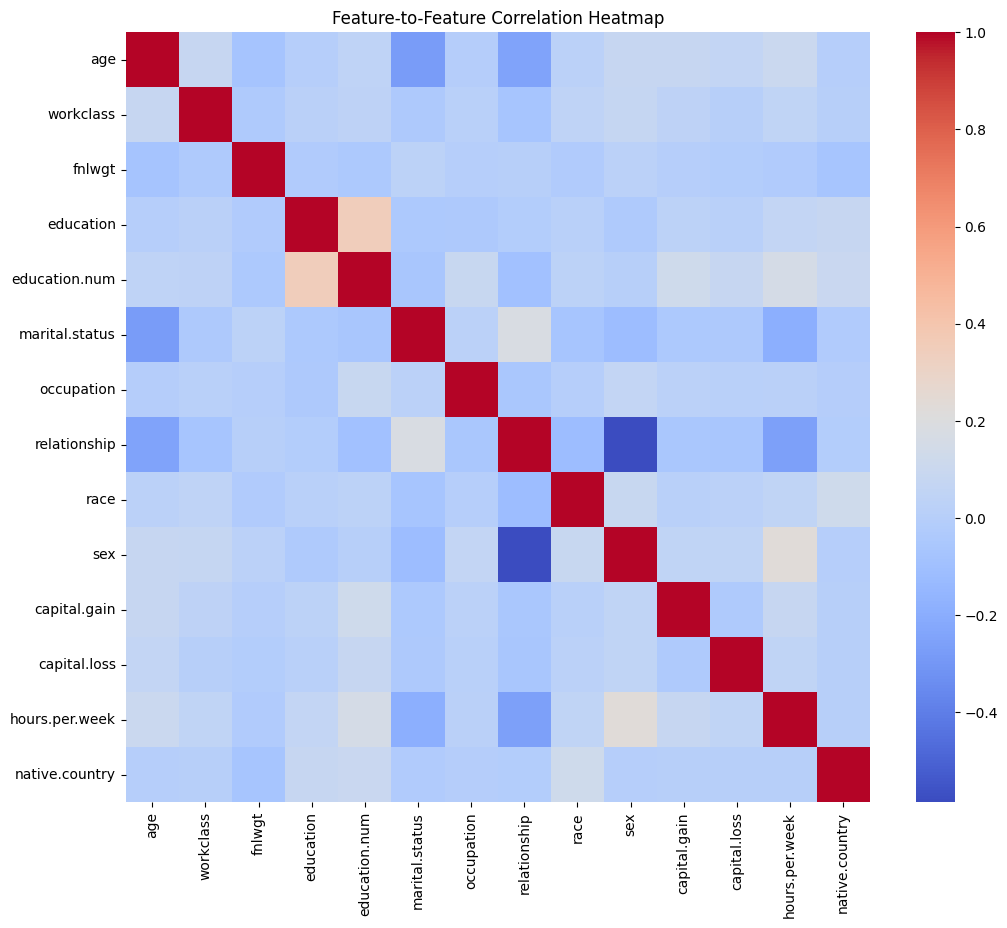

In [20]:
print("\n=== Feature-to-feature correlation matrix ===")
feature_corr = X.corr()
print(feature_corr)

plt.figure(figsize=(12, 10))
sns.heatmap(feature_corr, annot=False, cmap='coolwarm')
plt.title("Feature-to-Feature Correlation Heatmap")
plt.show()

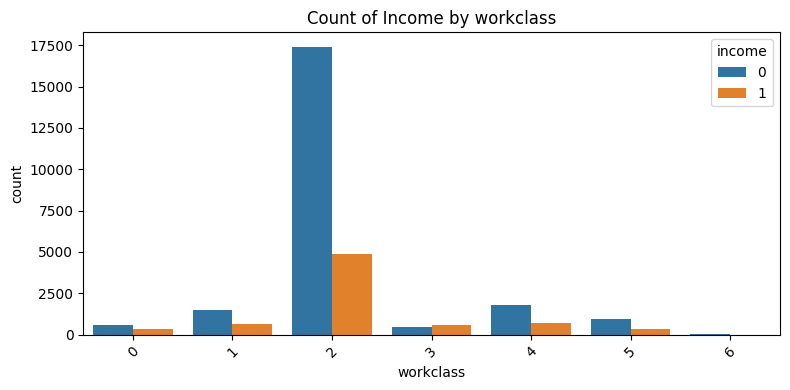

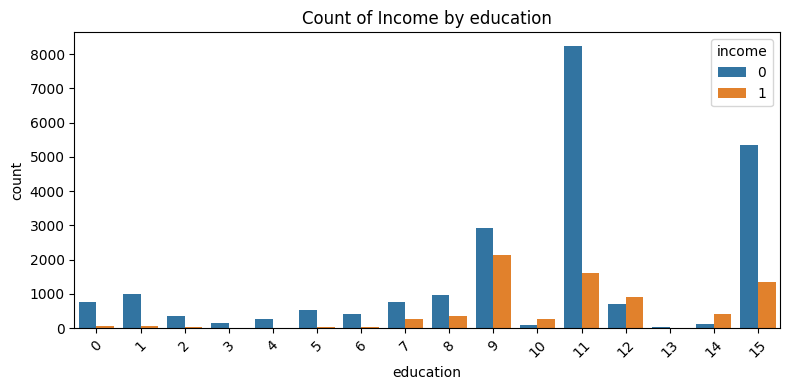

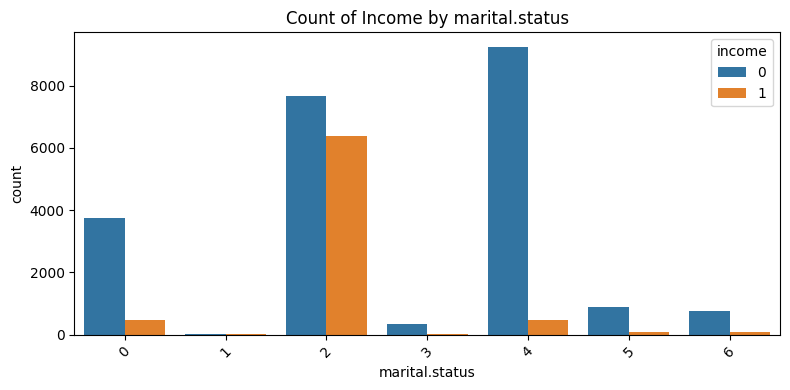

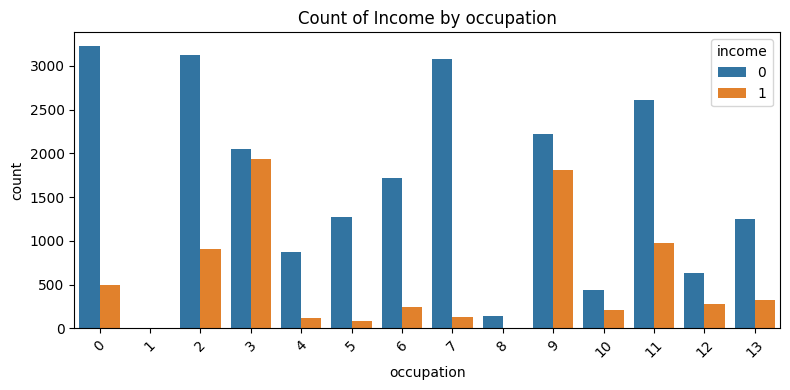

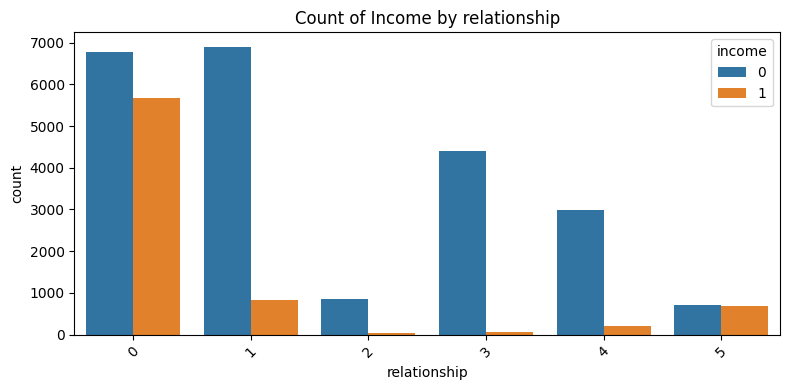

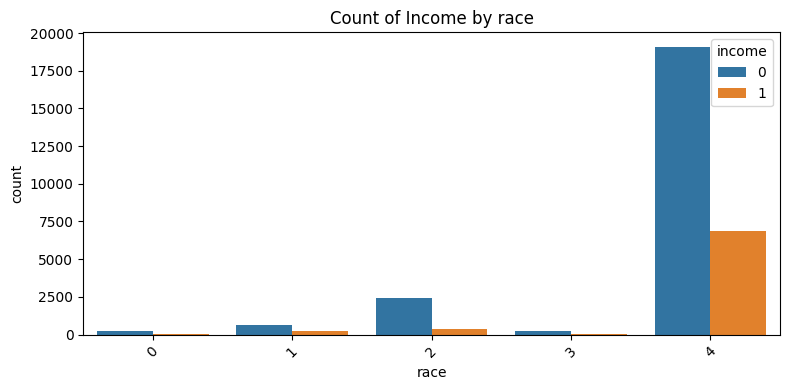

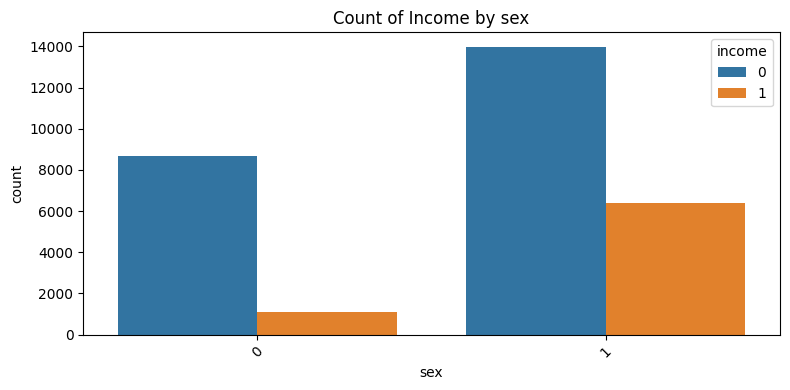

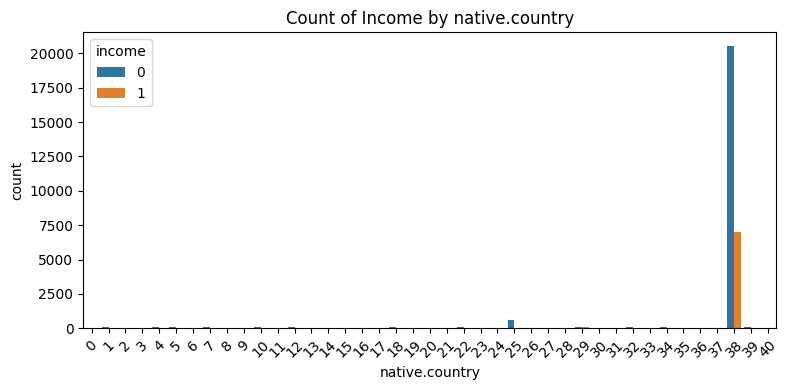

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols_wo_income = [
    'workclass', 'education', 'marital.status', 'occupation',
    'relationship', 'race', 'sex', 'native.country'
]

for col in categorical_cols_wo_income:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=col, hue='income')
    plt.title(f"Count of Income by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


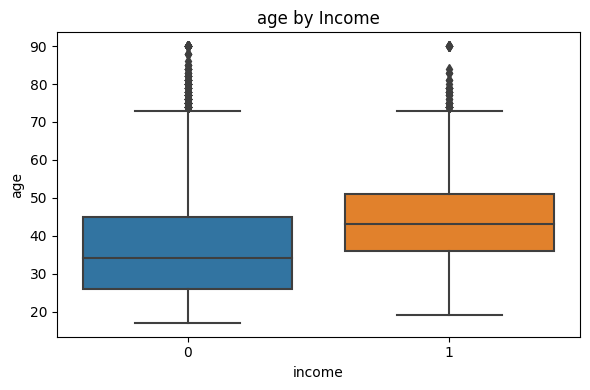

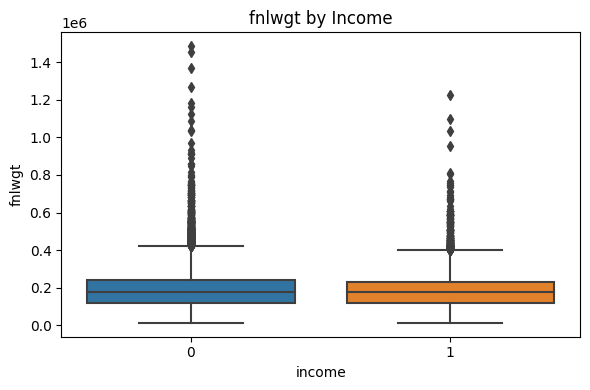

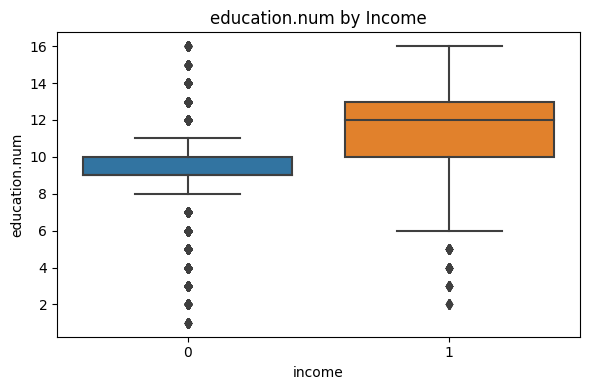

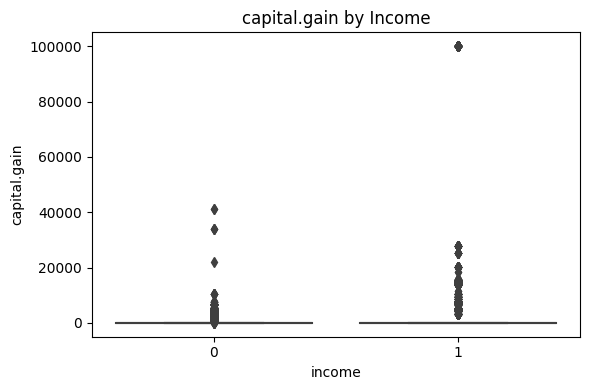

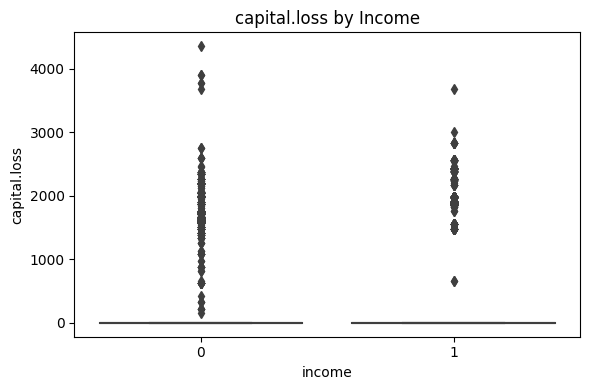

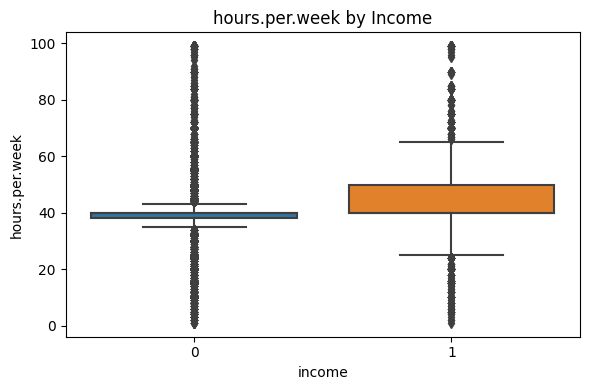

In [22]:
numerical_cols = ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='income', y=col, data=df)
    plt.title(f"{col} by Income")
    plt.tight_layout()
    plt.show()


In [ ]:
sns.violinplot(x='income', y='age', data=df)


In [ ]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    for income_value in df['income'].unique():
        subset = df[df['income'] == income_value]
        sns.kdeplot(subset[col], label=f"Income = {income_value}", fill=True)
    plt.title(f"Distribution of {col} by Income")
    plt.legend()
    plt.tight_layout()
    plt.show()


In [23]:
drop_cols.append("education")

In [ ]:
drop_cols

In [24]:
df.drop(columns=drop_cols, inplace=True)

In [25]:
df.columns = df.columns.str.replace('.', '_', regex=False).str.lower().str.strip()

In [26]:
print("Cleaned column names:")
print(df.columns.tolist())

Cleaned column names:
['age', 'education_num', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'income']


In [27]:
df.head()

,age,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,income
1,82,9,6,3,1,4,0,0,4356,18,0
3,54,4,0,6,4,4,0,0,3900,40,0
4,41,10,5,9,3,4,0,0,3900,40,0
5,34,9,0,7,4,4,0,0,3770,45,0
6,38,6,5,0,4,4,1,0,3770,40,0


In [28]:
label_encoders

{'workclass': LabelEncoder(),
 'education': LabelEncoder(),
 'marital.status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'native.country': LabelEncoder(),
 'income': LabelEncoder()}

In [29]:
for col in drop_cols:
    label_encoders.pop(col, None)

#  Update keys in label_encoders to match renamed columns
label_encoders = {
    col.replace('.', '_').lower().strip(): le
    for col, le in label_encoders.items()
}

#  Confirm updated keys match df.columns
print("Label encoders available for columns:")
print(label_encoders.keys())

Label encoders available for columns:
dict_keys(['marital_status', 'occupation', 'relationship', 'race', 'sex', 'income'])


In [30]:
label_encoders

{'marital_status': LabelEncoder(),
 'occupation': LabelEncoder(),
 'relationship': LabelEncoder(),
 'race': LabelEncoder(),
 'sex': LabelEncoder(),
 'income': LabelEncoder()}

In [31]:
X = df.drop("income", axis=1)
y = df["income"]

In [32]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

# Now:
# 70% → train
# 15% → dev (hyperparam tuning)
# 15% → test (final evaluation)


In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import f1_score
import random

In [35]:
class ANN1(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units), # first hidden layer
            nn.BatchNorm1d(hidden_units), # do batch normalization on Z the preactivation
            nn.ReLU(), # relu activation function
            nn.Linear(hidden_units, 1), # next linear layer
            nn.Sigmoid() # sigmoid activation directly
        )

    def forward(self, x):
        return self.net(x).squeeze() # .squeeze() removes any singleton dimensions

In [36]:
def train_one_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad() # clear prev mini batch gradients
        out = model(xb)
        loss = criterion(out, yb.float())
        loss.backward() # back prop
        optimizer.step()
        total_loss += loss.item() * xb.size(0)
    return total_loss / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    preds, targets = [], []
    total_loss = 0
    with torch.no_grad():
        for xb, yb in loader:
            out = model(xb)
            loss = criterion(out, yb.float())
            total_loss += loss.item() * xb.size(0)
            preds += (out > 0.5).long().tolist() # threshold 0.5
            targets += yb.tolist()
    f1 = f1_score(targets, preds) # use f1 score
    return total_loss / len(loader.dataset), f1


In [37]:
eg_model = ANN1(input_dim=X_train.shape[1], hidden_units = 64)

In [38]:
eg_model

ANN1(
  (net): Sequential(
    (0): Linear(in_features=10, out_features=64, bias=True)
    (1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=64, out_features=1, bias=True)
    (4): Sigmoid()
  )
)

In [41]:
def run_trial(X_train, y_train, X_dev, y_dev, lr, mini_batch_size = 64, verbose=True):
    # Create datasets and loaders
    train_ds = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.long)
    )

    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )


    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN1(input_dim=X_train.shape[1], hidden_units=64)
    
    # Optimizer with standard L2 regularization
    optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,                   # learning rate
    betas=(0.9, 0.999),      # beta1 and beta2 (default values)
    eps=1e-8,                # epsilon for numerical stability
    weight_decay=1e-4,       # L2 regularization 
    amsgrad=False            # variant of Adam, keep False unless testing AMSGrad
)

    criterion = nn.BCELoss()

    for epoch in range(20):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


- Learning rate is the most important parameter.
- beta1 = 0.9, beta2 = 0.999, epsilon = 10^-8 seldom need changing and are given directly by authors in the paper so we will not touch those at all.
- After learning rate, mini batch size, hidden units, and beta if using rms prop become imoprtant.
- Then hidden layers.

For learning rate it is very important that the sampling is not uniform on teh typical scale, but on the log scale.
Becomes more sensitive as it is close to 0 or 1.

In [42]:
run_trial(X_train, y_train, X_dev, y_dev, lr = 0.00001)

[LR=1.0e-05] Epoch 01 | Train Loss: 0.6737 | Dev Loss: 0.6750 | Dev F1: 0.3191
[LR=1.0e-05] Epoch 02 | Train Loss: 0.6631 | Dev Loss: 0.6602 | Dev F1: 0.3187
[LR=1.0e-05] Epoch 03 | Train Loss: 0.6523 | Dev Loss: 0.6470 | Dev F1: 0.3144
[LR=1.0e-05] Epoch 04 | Train Loss: 0.6423 | Dev Loss: 0.6436 | Dev F1: 0.3227
[LR=1.0e-05] Epoch 05 | Train Loss: 0.6319 | Dev Loss: 0.6334 | Dev F1: 0.3190
[LR=1.0e-05] Epoch 06 | Train Loss: 0.6215 | Dev Loss: 0.6266 | Dev F1: 0.3224
[LR=1.0e-05] Epoch 07 | Train Loss: 0.6151 | Dev Loss: 0.6227 | Dev F1: 0.3223
[LR=1.0e-05] Epoch 08 | Train Loss: 0.6068 | Dev Loss: 0.6124 | Dev F1: 0.3185
[LR=1.0e-05] Epoch 09 | Train Loss: 0.6002 | Dev Loss: 0.6086 | Dev F1: 0.3187
[LR=1.0e-05] Epoch 10 | Train Loss: 0.5932 | Dev Loss: 0.6051 | Dev F1: 0.3224
[LR=1.0e-05] Epoch 11 | Train Loss: 0.5867 | Dev Loss: 0.5957 | Dev F1: 0.3179
[LR=1.0e-05] Epoch 12 | Train Loss: 0.5812 | Dev Loss: 0.5914 | Dev F1: 0.3157
[LR=1.0e-05] Epoch 13 | Train Loss: 0.5752 | Dev Los

Training and Dev loss are decreasing very slowly. low f1 score suggets its baised towards the majority class

In [43]:
run_trial(X_train, y_train, X_dev, y_dev, lr = 0.0001)
# default is 0.001

[LR=1.0e-04] Epoch 01 | Train Loss: 0.6399 | Dev Loss: 0.6235 | Dev F1: 0.3206
[LR=1.0e-04] Epoch 02 | Train Loss: 0.5725 | Dev Loss: 0.5613 | Dev F1: 0.3254
[LR=1.0e-04] Epoch 03 | Train Loss: 0.5241 | Dev Loss: 0.5237 | Dev F1: 0.3424
[LR=1.0e-04] Epoch 04 | Train Loss: 0.5004 | Dev Loss: 0.5008 | Dev F1: 0.3394
[LR=1.0e-04] Epoch 05 | Train Loss: 0.4829 | Dev Loss: 0.4771 | Dev F1: 0.4298
[LR=1.0e-04] Epoch 06 | Train Loss: 0.4656 | Dev Loss: 0.4564 | Dev F1: 0.3986
[LR=1.0e-04] Epoch 07 | Train Loss: 0.4563 | Dev Loss: 0.4469 | Dev F1: 0.4252
[LR=1.0e-04] Epoch 08 | Train Loss: 0.4496 | Dev Loss: 0.4358 | Dev F1: 0.4264
[LR=1.0e-04] Epoch 09 | Train Loss: 0.4419 | Dev Loss: 0.4308 | Dev F1: 0.4149
[LR=1.0e-04] Epoch 10 | Train Loss: 0.4349 | Dev Loss: 0.4217 | Dev F1: 0.4072
[LR=1.0e-04] Epoch 11 | Train Loss: 0.4287 | Dev Loss: 0.4212 | Dev F1: 0.3911
[LR=1.0e-04] Epoch 12 | Train Loss: 0.4262 | Dev Loss: 0.4154 | Dev F1: 0.3970
[LR=1.0e-04] Epoch 13 | Train Loss: 0.4209 | Dev Los

Increasing the learning rate seems to decreases both losses more quickly

In [44]:
run_trial(X_train, y_train, X_dev, y_dev, lr = 0.001)
# this did not see a steady decrease on the validation set
# but did see on the train, the dev f1 score was best around epoch 16
# maybe overfitting after epoch 16

[LR=1.0e-03] Epoch 01 | Train Loss: 0.5090 | Dev Loss: 0.4501 | Dev F1: 0.4413
[LR=1.0e-03] Epoch 02 | Train Loss: 0.4404 | Dev Loss: 0.4273 | Dev F1: 0.3825
[LR=1.0e-03] Epoch 03 | Train Loss: 0.4212 | Dev Loss: 0.4043 | Dev F1: 0.4345
[LR=1.0e-03] Epoch 04 | Train Loss: 0.4223 | Dev Loss: 0.4140 | Dev F1: 0.4325
[LR=1.0e-03] Epoch 05 | Train Loss: 0.4193 | Dev Loss: 0.4027 | Dev F1: 0.4235
[LR=1.0e-03] Epoch 06 | Train Loss: 0.4134 | Dev Loss: 0.3936 | Dev F1: 0.4200
[LR=1.0e-03] Epoch 07 | Train Loss: 0.4083 | Dev Loss: 0.3871 | Dev F1: 0.4517
[LR=1.0e-03] Epoch 08 | Train Loss: 0.4092 | Dev Loss: 0.4035 | Dev F1: 0.4311
[LR=1.0e-03] Epoch 09 | Train Loss: 0.4071 | Dev Loss: 0.3969 | Dev F1: 0.3867
[LR=1.0e-03] Epoch 10 | Train Loss: 0.4077 | Dev Loss: 0.3791 | Dev F1: 0.4913
[LR=1.0e-03] Epoch 11 | Train Loss: 0.4044 | Dev Loss: 0.3842 | Dev F1: 0.5164
[LR=1.0e-03] Epoch 12 | Train Loss: 0.4039 | Dev Loss: 0.3870 | Dev F1: 0.4546
[LR=1.0e-03] Epoch 13 | Train Loss: 0.4024 | Dev Los

will try with smaller learning rate, maybe it is bouncing near local minima

In [45]:
run_trial(X_train, y_train, X_dev, y_dev, lr = 0.0005)


[LR=5.0e-04] Epoch 01 | Train Loss: 0.5738 | Dev Loss: 0.4854 | Dev F1: 0.3629
[LR=5.0e-04] Epoch 02 | Train Loss: 0.4560 | Dev Loss: 0.4333 | Dev F1: 0.3765
[LR=5.0e-04] Epoch 03 | Train Loss: 0.4289 | Dev Loss: 0.4235 | Dev F1: 0.4229
[LR=5.0e-04] Epoch 04 | Train Loss: 0.4186 | Dev Loss: 0.4020 | Dev F1: 0.4363
[LR=5.0e-04] Epoch 05 | Train Loss: 0.4093 | Dev Loss: 0.4071 | Dev F1: 0.4297
[LR=5.0e-04] Epoch 06 | Train Loss: 0.4068 | Dev Loss: 0.3895 | Dev F1: 0.5133
[LR=5.0e-04] Epoch 07 | Train Loss: 0.4042 | Dev Loss: 0.3893 | Dev F1: 0.4761
[LR=5.0e-04] Epoch 08 | Train Loss: 0.4006 | Dev Loss: 0.3941 | Dev F1: 0.4437
[LR=5.0e-04] Epoch 09 | Train Loss: 0.3979 | Dev Loss: 0.3663 | Dev F1: 0.5318
[LR=5.0e-04] Epoch 10 | Train Loss: 0.3929 | Dev Loss: 0.3749 | Dev F1: 0.5396
[LR=5.0e-04] Epoch 11 | Train Loss: 0.3893 | Dev Loss: 0.3792 | Dev F1: 0.4959
[LR=5.0e-04] Epoch 12 | Train Loss: 0.3905 | Dev Loss: 0.3709 | Dev F1: 0.4798
[LR=5.0e-04] Epoch 13 | Train Loss: 0.3910 | Dev Los

Here at epoch number 18 best performance on dev set, afterwards starts to overfit maybe. But improved F1 on decreasing learning rate from 0.001 to 0.0005.

Can consider adding early stopping here after about 3 epochs.

Lets try a smaller learning rate maybe we will see a better F1 score

In [46]:
run_trial(X_train, y_train, X_dev, y_dev, lr = 0.0003)
# it did not bouce around as much but best result of 0.68 f1 gotten for lr = 5e-4

[LR=3.0e-04] Epoch 01 | Train Loss: 0.5704 | Dev Loss: 0.5105 | Dev F1: 0.3455
[LR=3.0e-04] Epoch 02 | Train Loss: 0.4728 | Dev Loss: 0.4437 | Dev F1: 0.4161
[LR=3.0e-04] Epoch 03 | Train Loss: 0.4405 | Dev Loss: 0.4141 | Dev F1: 0.4399
[LR=3.0e-04] Epoch 04 | Train Loss: 0.4243 | Dev Loss: 0.4185 | Dev F1: 0.4100
[LR=3.0e-04] Epoch 05 | Train Loss: 0.4195 | Dev Loss: 0.3985 | Dev F1: 0.4399
[LR=3.0e-04] Epoch 06 | Train Loss: 0.4119 | Dev Loss: 0.4121 | Dev F1: 0.3399
[LR=3.0e-04] Epoch 07 | Train Loss: 0.4130 | Dev Loss: 0.3919 | Dev F1: 0.4329
[LR=3.0e-04] Epoch 08 | Train Loss: 0.4061 | Dev Loss: 0.3934 | Dev F1: 0.4097
[LR=3.0e-04] Epoch 09 | Train Loss: 0.4050 | Dev Loss: 0.3914 | Dev F1: 0.4290
[LR=3.0e-04] Epoch 10 | Train Loss: 0.4012 | Dev Loss: 0.3847 | Dev F1: 0.5295
[LR=3.0e-04] Epoch 11 | Train Loss: 0.3984 | Dev Loss: 0.3892 | Dev F1: 0.5016
[LR=3.0e-04] Epoch 12 | Train Loss: 0.3964 | Dev Loss: 0.4095 | Dev F1: 0.4514
[LR=3.0e-04] Epoch 13 | Train Loss: 0.3997 | Dev Los

But maybe more epochs would have given better results?

In [48]:
def run_trial2(X_train, y_train, X_dev, y_dev, lr, epochs = 20, mini_batch_size = 64, verbose=True):
    # Create datasets and loaders
    train_ds = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.long)
    )

    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )


    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN1(input_dim=X_train.shape[1], hidden_units=64)
    
    # Optimizer with standard L2 regularization
    optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,                   # learning rate
    betas=(0.9, 0.999),      # beta1 and beta2 (default values)
    eps=1e-8,                # epsilon for numerical stability
    weight_decay=1e-4,       # L2 regularization 
    amsgrad=False            # variant of Adam, keep False unless testing AMSGrad
)

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


In [49]:
run_trial2(X_train, y_train, X_dev, y_dev, lr = 0.0003, epochs = 30)

[LR=3.0e-04] Epoch 01 | Train Loss: 0.6333 | Dev Loss: 0.5609 | Dev F1: 0.4266
[LR=3.0e-04] Epoch 02 | Train Loss: 0.5077 | Dev Loss: 0.4907 | Dev F1: 0.4374
[LR=3.0e-04] Epoch 03 | Train Loss: 0.4657 | Dev Loss: 0.4489 | Dev F1: 0.4427
[LR=3.0e-04] Epoch 04 | Train Loss: 0.4377 | Dev Loss: 0.4318 | Dev F1: 0.3922
[LR=3.0e-04] Epoch 05 | Train Loss: 0.4262 | Dev Loss: 0.4146 | Dev F1: 0.4408
[LR=3.0e-04] Epoch 06 | Train Loss: 0.4167 | Dev Loss: 0.4024 | Dev F1: 0.4179
[LR=3.0e-04] Epoch 07 | Train Loss: 0.4099 | Dev Loss: 0.3992 | Dev F1: 0.4345
[LR=3.0e-04] Epoch 08 | Train Loss: 0.4063 | Dev Loss: 0.3873 | Dev F1: 0.4771
[LR=3.0e-04] Epoch 09 | Train Loss: 0.4074 | Dev Loss: 0.3838 | Dev F1: 0.4713
[LR=3.0e-04] Epoch 10 | Train Loss: 0.4007 | Dev Loss: 0.3911 | Dev F1: 0.5398
[LR=3.0e-04] Epoch 11 | Train Loss: 0.3963 | Dev Loss: 0.3743 | Dev F1: 0.5912
[LR=3.0e-04] Epoch 12 | Train Loss: 0.4009 | Dev Loss: 0.3976 | Dev F1: 0.4178
[LR=3.0e-04] Epoch 13 | Train Loss: 0.4005 | Dev Los

## LR = 0.0005 seems to be the best yet for the current config

Will now try with different hidden units

In [50]:
def run_trial3(X_train, y_train, X_dev, y_dev, lr, epochs = 20,hidden_units = 64, mini_batch_size = 64, verbose=True):
    # Create datasets and loaders
    train_ds = TensorDataset(
    torch.tensor(X_train.values, dtype=torch.float32),
    torch.tensor(y_train.values, dtype=torch.long)
    )

    dev_ds = TensorDataset(
        torch.tensor(X_dev.values, dtype=torch.float32),
        torch.tensor(y_dev.values, dtype=torch.long)
    )


    train_loader = DataLoader(train_ds, batch_size=mini_batch_size, shuffle=True)
    dev_loader = DataLoader(dev_ds, batch_size=256)

    # Model
    model = ANN1(input_dim=X_train.shape[1], hidden_units=hidden_units)
    
    # Optimizer with standard L2 regularization
    optimizer = torch.optim.Adam(
    model.parameters(),
    lr=lr,                   # learning rate
    betas=(0.9, 0.999),      # beta1 and beta2 (default values)
    eps=1e-8,                # epsilon for numerical stability
    weight_decay=1e-4,       # L2 regularization 
    amsgrad=False            # variant of Adam, keep False unless testing AMSGrad
)

    criterion = nn.BCELoss()

    for epoch in range(epochs):
        train_loss = train_one_epoch(model, train_loader, optimizer, criterion)
        val_loss, f1 = evaluate(model, dev_loader, criterion)
        if verbose:
            print(f"[LR={lr:.1e}] Epoch {epoch+1:02d} | Train Loss: {train_loss:.4f} | Dev Loss: {val_loss:.4f} | Dev F1: {f1:.4f}")


In [51]:
run_trial3(X_train, y_train, X_dev, y_dev, lr = 0.0003, epochs = 25, hidden_units = 128)

[LR=3.0e-04] Epoch 01 | Train Loss: 0.5695 | Dev Loss: 0.5225 | Dev F1: 0.3442
[LR=3.0e-04] Epoch 02 | Train Loss: 0.4878 | Dev Loss: 0.4686 | Dev F1: 0.3959
[LR=3.0e-04] Epoch 03 | Train Loss: 0.4452 | Dev Loss: 0.4333 | Dev F1: 0.4173
[LR=3.0e-04] Epoch 04 | Train Loss: 0.4268 | Dev Loss: 0.4070 | Dev F1: 0.4285
[LR=3.0e-04] Epoch 05 | Train Loss: 0.4131 | Dev Loss: 0.3907 | Dev F1: 0.4748
[LR=3.0e-04] Epoch 06 | Train Loss: 0.4077 | Dev Loss: 0.4027 | Dev F1: 0.3992
[LR=3.0e-04] Epoch 07 | Train Loss: 0.4054 | Dev Loss: 0.3983 | Dev F1: 0.4524
[LR=3.0e-04] Epoch 08 | Train Loss: 0.4063 | Dev Loss: 0.4038 | Dev F1: 0.3554
[LR=3.0e-04] Epoch 09 | Train Loss: 0.4024 | Dev Loss: 0.3871 | Dev F1: 0.4861
[LR=3.0e-04] Epoch 10 | Train Loss: 0.3990 | Dev Loss: 0.3764 | Dev F1: 0.5850
[LR=3.0e-04] Epoch 11 | Train Loss: 0.3978 | Dev Loss: 0.3816 | Dev F1: 0.5641
[LR=3.0e-04] Epoch 12 | Train Loss: 0.3983 | Dev Loss: 0.3770 | Dev F1: 0.6027
[LR=3.0e-04] Epoch 13 | Train Loss: 0.4002 | Dev Los

Nope increasing hidden units from 64 to 128 ain't doing a good job.

In [52]:
class ANN2(nn.Module):
    def __init__(self, input_dim, hidden_units):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, hidden_units),            # First hidden layer
            nn.BatchNorm1d(hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, hidden_units),          # Second hidden layer
            nn.BatchNorm1d(hidden_units),
            nn.ReLU(),
            nn.Linear(hidden_units, 1),                     # Output layer
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x).squeeze()


# After this point refer to Kaggle, it did not save the last few blocks of code so I downlaoded the notebook from Kaggle and continued there.